In [1]:
#Importación de librearías necesarias
import pandas as pd
from datetime import datetime
import socket
import numpy as np
import math
import time
import pickle  #Para guardar archivos
import os
os.environ['OMP_NUM_THREADS'] = '1'

from pympler import asizeof #Para liberar memoria
import gc

from matplotlib import pyplot as plt

In [2]:
#Path general de archivos
if socket.gethostname()=='LAPTOP-PUSGG08B': #Ip de la laptop
    ruta = "E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/Data/TFM/"
    r_ruta = "E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/"
    r_graf = 'E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/Reportes/'
elif socket.gethostname()=='PCUIOMTDAIE6382': #Ip del working
    ruta =   "D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/Data/TFM/"
    r_ruta = "D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/RData/TFM/"
    r_graf = 'D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/Reportes/'

# Ruta del archivo de pensionistas de vejez
ruta_vj = ruta + 'POB_VEJ_CD656_NEW.dsv'
# Ruta del archivo de pensionistas de vejez impoisiciones 
ruta_vj_ic = ruta + 'POB_VEJ_CD656_IC.dsv'

# Ruta del archivo de pensionistas de invalidez
ruta_inv = ruta + 'POB_INV_CD656_NEW.dsv'
# Ruta del archivo de pensionistas de invalidez impoisiciones 
ruta_inv_ic = ruta + 'POB_INV_CD656_IC.dsv'

# Ruta del archivo de pensionistas de discapacidad
ruta_dis = ruta + 'POB_DIS_CD656_NEW.dsv'
# Ruta del archivo de pensionistas de discapacidad
ruta_dis_ic = ruta + 'POB_DIS_CD656_IC.dsv'

# Ruta del archivo de historia laboral de pensionistas
ruta_afi = ruta + 'APORTES_CD656_new.dsv'

# Ruta del archivo de coeficientes para el calculo de la pensión
ruta_coe = ruta + 'Coeficientes.xlsx'

In [ ]:
# Cargar archivo------------------------------------------------------------------------------------------------------------
##Archivo con cluster jerarquico
print('Se cargan los archivos necesarios')
inicio = time.time()
directorio = r_ruta
nombre_archivo = 'viu_cj_data_ati.pkl
ruta_archivo = os.path.join(directorio, nombre_archivo)

with open( ruta_archivo, 'rb') as archivo:
    data_cj = pickle.load( archivo ) 
    
##Archivo con kmean
directorio = r_ruta
nombre_archivo = 'viu_kmean_data_ati.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)

with open( ruta_archivo, 'rb') as archivo:
    data_km = pickle.load( archivo ) 
    
##Archivo con dbscan
directorio = r_ruta
nombre_archivo = 'viu_db_data_ati.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)

with open( ruta_archivo, 'rb') as archivo:
    data_db = pickle.load( archivo ) 
    
fin = time.time()  
tm = fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60 ,'minutos y',tm%60, 'segundos' )

In [ ]:
#Data cluster jerarquico
data_cj.head(20)

In [ ]:
#Data kmean
data_km.head(20)

In [ ]:
#Data dbscan
data_db.head(20)

In [ ]:
#Se verifica que tengan el mismo indice

# data_cj[data_cj['INDICE']!=data_km['INDICE']] #Todo igual
# data_cj[data_cj['INDICE']!=data_db['INDICE']] #Todo igual
# data_km[data_km['INDICE']!=data_db['INDICE']] #Todo igual

#Se verifica que tengan el mismo salario
# data_cj[data_cj['SALARIO']!=data_km['SALARIO']] #Todo igual
# data_cj[data_cj['SALARIO']!=data_db['SALARIO']] #Todo igual
# data_km[data_km['SALARIO']!=data_db['SALARIO']] #Todo igual


# data1.set_index('INDICE', inplace=True )
# cedul = list(dic_sim.keys())  #total de 111903
# filtro = data1[ data1['CEDULA_COD'].isin(cedul )] # 111903 cedulas
# indi = filtro.index
# ml.loc[ indi, 'ATI_DB_AS'] = filtro['ATI_DB_AS']


In [ ]:
data_cj.columns

In [ ]:
data_km.columns

In [ ]:
data_db.columns

In [ ]:
#Se une los dataframe en un solo archivo
print('Se unen los archivos según la variable de atipicos')
inicio = time.time()

val = ['CEDULA_COD', 'ANIO', 'MES', 'SALARIO', 'SALARIO_SECTOR', 'SECTOR_A',
       'NUM_SEC_MES', '%_NUM_SECTOR', 'GRUPO', 'SAL_PROM_GRUPO', 'GRUPO_SEL',
       'INI_CAL', 'FIN_CAL', 'BASE_CAL', 'SBU', 'ID_SBU', 'INDICE', 'LS1',
       'SAL_PROM1', 'LS2', 'SAL_PROM2', 'LS_MS', 'ATI_CJ']

data_ati = pd.concat( [ data_cj[val], data_km['ATI_KM'], data_db['ATI_DB'] ], axis = 1 )

fin = time.time()  
tm = fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60 ,'minutos y',tm%60, 'segundos' )

del data_cj, data_km, data_db
gc.collect()

In [ ]:
#Se guardan los resultados 
nombre_archivo = 'viu_data_ati_union.pkl'
# Ruta completa del archivo
ruta_archivo = os.path.join(directorio, nombre_archivo)
# Guardar los objetos en el archivo
with open(ruta_archivo, 'wb') as archivo:
    pickle.dump(data_ati, archivo) 

In [3]:
# Cargar archivo------------------------------------------------------------------------------------------------------------
directorio = r_ruta
nombre_archivo = 'viu_data_ati_union.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)
data_ati = pd.read_pickle(ruta_archivo)

In [ ]:
print('Cedulas con al menos un atipico por el CJ', data_ati[data_ati['ATI_CJ']==1]['CEDULA_COD'].nunique()) #171158
print('Cedulas con al menos un atipico por el KM', data_ati[data_ati['ATI_KM']==1]['CEDULA_COD'].nunique()) #171158
print('Cedulas con al menos un atipico por el DB', data_ati[data_ati['ATI_DB']==1]['CEDULA_COD'].nunique()) # 191935

In [ ]:
print(data_ati[ (data_ati['GRUPO_SEL']==1) & (data_ati['ATI_CJ']!=data_ati['ATI_KM'])]['CEDULA_COD'].nunique()) #0
print(data_ati[ (data_ati['GRUPO_SEL']==1) & (data_ati['ATI_CJ']!=data_ati['ATI_DB'])]['CEDULA_COD'].nunique()) #77834
print(data_ati[ (data_ati['GRUPO_SEL']==1) & (data_ati['ATI_KM']!=data_ati['ATI_DB'])]['CEDULA_COD'].nunique()) #77834

In [ ]:
print('Valores unicos en ATI_CJ', data_ati[data_ati['GRUPO_SEL']==1]['ATI_CJ'].unique()) #[0. 1.]
print('Valores unicos en ATI_KM', data_ati[data_ati['GRUPO_SEL']==1]['ATI_KM'].unique()) #[0. 1.]
print('Valores unicos en ATI_DB', data_ati[data_ati['GRUPO_SEL']==1]['ATI_DB'].unique()) #[0. 1.]

In [4]:
#Calcular la Base de calculo sin considerar los atipicos
def base_cal_sin_ati( data, val ):
    df = data.copy()
    nom = 'BCS_'+ val.split('_')[-1]
    grupo = df[ (df['GRUPO_SEL'] == 1 ) & (df[ val ] != 1)].copy()
    df_prom = grupo.groupby('CEDULA_COD')['SALARIO'].mean()
    data[nom] = data['CEDULA_COD'].map( df_prom ) 

In [5]:
print('Se corrige la base de calculo sin considerar a los atipicos')
inicio = time.time()
base_cal_sin_ati( data_ati, 'ATI_CJ')
base_cal_sin_ati( data_ati, 'ATI_KM')
base_cal_sin_ati( data_ati, 'ATI_DB')
fin = time.time()  
tm = fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60 ,'minutos y',tm%60, 'segundos' )

Se corrige la base de calculo sin considerar a los atipicos
Tiempo de ejecución es: 0.0 horas con 6.0 minutos y 21.90604019165039 segundos


In [6]:
inicio = time.time()
ced_ati_cj = data_ati[data_ati['GRUPO_SEL'] == 1].groupby('CEDULA_COD').filter(lambda x: (x['ATI_CJ'] == 1).all())['CEDULA_COD'].unique()
ced_ati_km = data_ati[data_ati['GRUPO_SEL'] == 1].groupby('CEDULA_COD').filter(lambda x: (x['ATI_KM'] == 1).all())['CEDULA_COD'].unique()
ced_ati_db = data_ati[data_ati['GRUPO_SEL'] == 1].groupby('CEDULA_COD').filter(lambda x: (x['ATI_DB'] == 1).all())['CEDULA_COD'].unique()
fin = time.time()  
tm = fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60 ,'minutos y',tm%60, 'segundos' )

Tiempo de ejecución es: 0.0 horas con 6.0 minutos y 10.019404411315918 segundos


In [ ]:
print('Las cedulas que tiene todos su mejores años como atipicos para CJ son:', len(ced_ati_cj)) #206
print('Las cedulas que tiene todos su mejores años como atipicos para KM son:', len(ced_ati_km)) #206
print('Las cedulas que tiene todos su mejores años como atipicos para DB son:', len(ced_ati_db)) #40600

In [7]:
data_ati[  (data_ati['BCS_CJ'].isna()) & (data_ati['CEDULA_COD'].isin(ced_ati_cj))]['CEDULA_COD'].unique()

array([    9886,    18457,    18587,    26418,    28952,    29231,
          32065,    77614,    82208,    91427,   101924,   109831,
         121539,   136769,   141723,   151405,   152360,   170923,
         176191,   190203,   231442,   257942,   943560,  1044228,
        1065832,  1109517,  1168190,  1387876,  1453892,  1464359,
        1466048,  1963534,  1974371,  2134581,  2163224,  2179612,
        2200652,  2206971,  2709638,  2716965,  2751406,  2776027,
        2787400,  2838639,  2876994,  2929966,  3457585,  3489500,
        3588938,  3623167,  3669092,  5021003,  5117015,  5192869,
        5312555,  5323177,  5374021,  5381866,  5408033,  5474721,
        5475833,  5481096,  5503233,  5507022,  5549024,  5566987,
        5582938,  5584467,  5592392,  5605432,  5607331,  5620680,
        5633075,  5636512,  5660945,  5671263,  5671523,  5678065,
        5688927,  5695293,  5706974,  5718033,  5719360,  5735864,
        5738196,  5787051,  5802521,  5808775,  5824597,  5828

In [72]:
data_ati[  (data_ati['BCS_KM'].isna()) & (data_ati['CEDULA_COD'].isin(ced_ati_km))]['CEDULA_COD'].unique()

array([    9886,    18457,    18587,    26418,    28952,    29231,
          32065,    77614,    82208,    91427,   101924,   109831,
         121539,   136769,   141723,   151405,   152360,   170923,
         176191,   190203,   231442,   257942,   943560,  1044228,
        1065832,  1109517,  1168190,  1387876,  1453892,  1464359,
        1466048,  1963534,  1974371,  2134581,  2163224,  2179612,
        2200652,  2206971,  2709638,  2716965,  2751406,  2776027,
        2787400,  2838639,  2876994,  2929966,  3457585,  3489500,
        3588938,  3623167,  3669092,  5021003,  5117015,  5192869,
        5312555,  5323177,  5374021,  5381866,  5408033,  5474721,
        5475833,  5481096,  5503233,  5507022,  5549024,  5566987,
        5582938,  5584467,  5592392,  5605432,  5607331,  5620680,
        5633075,  5636512,  5660945,  5671263,  5671523,  5678065,
        5688927,  5695293,  5706974,  5718033,  5719360,  5735864,
        5738196,  5787051,  5802521,  5808775,  5824597,  5828

In [73]:
data_ati[  (data_ati['BCS_DB'].isna()) & (data_ati['CEDULA_COD'].isin(ced_ati_db))]['CEDULA_COD'].unique().tolist()

[6037,
 8851,
 9315,
 9548,
 9622,
 9671,
 9804,
 9886,
 10419,
 10785,
 11053,
 11368,
 11449,
 11491,
 11574,
 11579,
 11648,
 12077,
 12273,
 12279,
 12282,
 12289,
 12326,
 12584,
 12713,
 12804,
 13192,
 13248,
 13262,
 13276,
 13293,
 13320,
 13349,
 13394,
 13417,
 13622,
 13764,
 15006,
 15017,
 15448,
 15571,
 15748,
 15792,
 15952,
 15957,
 16418,
 16973,
 17681,
 17839,
 17988,
 18002,
 18063,
 18169,
 18192,
 18320,
 18321,
 18341,
 18373,
 18382,
 18403,
 18457,
 18470,
 18486,
 18506,
 18587,
 18711,
 18964,
 19360,
 20186,
 20301,
 20384,
 20412,
 20414,
 20430,
 20504,
 20517,
 20523,
 20528,
 20555,
 20577,
 20596,
 20639,
 20695,
 20704,
 20920,
 20980,
 21016,
 21064,
 21116,
 21221,
 21251,
 21411,
 21473,
 21868,
 22894,
 22895,
 22896,
 22937,
 22986,
 23059,
 23151,
 23186,
 23296,
 23348,
 23349,
 23462,
 23500,
 23738,
 23781,
 23865,
 23933,
 23994,
 24045,
 24160,
 24398,
 24559,
 25564,
 25577,
 25588,
 25593,
 25653,
 25699,
 25710,
 25720,
 25722,
 25723,


In [44]:
#Para graficar el comportamiento de los atipicos
def graf_datos(data_i, ced, val, grupo_sel = 0, tipo='ATI_CJ'):
    #Adecuación de la base de datos
    idx = data_i.columns.get_loc( tipo )
    columnas_requeridas = ['CEDULA_COD', 'ANIO', 'MES', val, 'GRUPO_SEL', 'INDICE', 'BASE_CAL'] + list(data_i.columns[idx:])
    data = data_i[data_i['CEDULA_COD'] == ced][columnas_requeridas]
    
    # Establecer si se quieren todos o solos los 5 mejores años
    if(grupo_sel == 1):
        data = data[data['GRUPO_SEL']==1]
    
    #Fecha para eje x
    anios = data['ANIO'].tolist()
    meses = data['MES'].tolist()
    fechas = [datetime(year=anio, month=mes, day=1) for anio, mes in zip(anios, meses)]
    data['FECHA']= pd.to_datetime(fechas)
    data = data.sort_values(by='FECHA')
    
    #Paleta de colores
    colors = plt.get_cmap('tab20').colors

    # Gráfico
    plt.figure(figsize=(12, 8))  
    marker_dict = {1: 'o', 2: 'x'} 
    
    data_aux = data[data['GRUPO_SEL']==1]
    if grupo_sel == 0: 
        Grupo_b= data[(data['GRUPO_SEL'] == 0)]
        plt.scatter(Grupo_b['FECHA'], Grupo_b[val], marker= '^', color='yellow', label='Valores no considerados')
        
        if 0 in (data_aux[tipo].unique()):
            Grupo_a = data_aux[data_aux[tipo] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data_aux[ tipo].unique()):
            Grupo= data_aux[data_aux[ tipo] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
            
        if -1 in (data_aux[tipo].unique()):
            Grupo= data_aux[data_aux[tipo] == -1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'green', label='Clúster único')
                
    else:
        if 0 in (data[tipo].unique()):
            Grupo_a = data[data[tipo] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data[tipo].unique()):
            Grupo= data[data[tipo] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
            
        if -1 in (data[tipo].unique()):
            Grupo= data[data[tipo] == -1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'green', label='Clúster único')
        
    
    plt.axhline(y= data['SAL_PROM2'].iloc[0], color= '#1297ff', linestyle='-', label='Promedio Salarios')
    plt.axhline(y=data['LS2'].iloc[0], alpha=1 , color= '#25ce00', linestyle='--', label='LS2')
    plt.axhline(y=data_aux['LS_MS'].iloc[0], alpha=1, color= '#875b20', linestyle='--', label='LS_MS')
    plt.axhline(y=data['BASE_CAL'].iloc[0], alpha=1, color= '#E800FF', linestyle=':', label='Base de cálculo')
    
    # Añadir el número de clusters, EPS, MINPTS
    plt.scatter( data_aux['FECHA'].iloc[0], data_aux[val].iloc[0], facecolors='none', label="Número de clústers: {}".format(int(max(data_aux[tipo].unique()) + 1)))
    
    # Añadir títulos y etiquetas
    plt.title(f"Aportaciones de la cédula: {ced}")
    plt.xlabel('FECHA')
    plt.ylabel(f"{val}")
    
    # Crear la leyenda
    leyenda = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    
    plt.grid(True)
    plt.show()

def graf_datos_guardar(data_i, ced, val, grupo_sel = 0, tipo='ATI_CJ', caso=1):
    #Adecuación de la base de datos
    idx = data_i.columns.get_loc( tipo )
    columnas_requeridas = ['CEDULA_COD', 'ANIO', 'MES', val, 'GRUPO_SEL', 'INDICE', 'BASE_CAL'] + list(data_i.columns[idx:])
    data = data_i[data_i['CEDULA_COD'] == ced][columnas_requeridas]
    
    # Establecer si se quieren todos o solos los 5 mejores años
    if(grupo_sel == 1):
        data = data[data['GRUPO_SEL']==1]
    
    #Fecha para eje x
    anios = data['ANIO'].tolist()
    meses = data['MES'].tolist()
    fechas = [datetime(year=anio, month=mes, day=1) for anio, mes in zip(anios, meses)]
    data['FECHA']= pd.to_datetime(fechas)
    data = data.sort_values(by='FECHA')
    
    #Paleta de colores
    colors = plt.get_cmap('tab20').colors

    # Gráfico
    plt.figure(figsize=(12, 8))  
    marker_dict = {1: 'o', 2: 'x'} 
    
    data_aux = data[data['GRUPO_SEL']==1]
    if grupo_sel == 0: 
        Grupo_b= data[(data['GRUPO_SEL'] == 0)]
        plt.scatter(Grupo_b['FECHA'], Grupo_b[val], marker= '^', color='yellow', label='Valores no considerados')
        
        if 0 in (data_aux[tipo].unique()):
            Grupo_a = data_aux[data_aux[tipo] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data_aux[tipo].unique()):
            Grupo= data_aux[data_aux[tipo] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
            
        if -1 in (data_aux[tipo].unique()):
            Grupo= data_aux[data_aux[tipo] == -1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'green', label='Clúster único')
                
    else:
        if 0 in (data[tipo].unique()):
            Grupo_a = data[data[tipo] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data[tipo].unique()):
            Grupo= data[data[tipo] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
            
        if -1 in (data[tipo].unique()):
            Grupo= data[data[tipo] == -1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'green', label='Clúster único')
        
    
    plt.axhline(y= data['SAL_PROM2'].iloc[0], color= '#1297ff', linestyle='-', label='Promedio Salarios')
    plt.axhline(y=data['LS2'].iloc[0], alpha=1 , color= '#25ce00', linestyle='--', label='LS2')
    plt.axhline(y=data_aux['LS_MS'].iloc[0], alpha=1, color= '#875b20', linestyle='--', label='LS_MS')
    plt.axhline(y=data['BASE_CAL'].iloc[0], alpha=1, color= '#E800FF', linestyle=':', label='Base de cálculo')
    
    # Añadir el número de clusters, EPS, MINPTS
    plt.scatter( data_aux['FECHA'].iloc[0], data_aux[val].iloc[0], facecolors='none', label="Número de clústers: {}".format(int(max(data_aux[tipo].unique()) + 1)))
    
    # Añadir títulos y etiquetas
    plt.title(f"Aportaciones de la cédula: {ced}")
    plt.xlabel('FECHA')
    plt.ylabel(f"{val}")
    
    # Crear la leyenda
    leyenda = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    
    plt.grid(True)
    plt.savefig( r_graf + 'algoritmo_'+ str(tipo) +'_' + str(ced)+'_'+ str(caso)+'.png' )

In [27]:
val = ['CEDULA_COD', 'ANIO', 'MES', 'SALARIO', 'SALARIO_SECTOR', 'SECTOR_A',
       'NUM_SEC_MES', '%_NUM_SECTOR', 'GRUPO', 'SAL_PROM_GRUPO', 'GRUPO_SEL',
       'INI_CAL', 'FIN_CAL', 'BASE_CAL', 'SBU', 'ID_SBU', 'INDICE', 'ATI_CJ', 'LS1',
       'SAL_PROM1', 'LS2', 'SAL_PROM2', 'LS_MS']
val2 = ['CEDULA_COD', 'ANIO', 'MES', 'SALARIO', 'SALARIO_SECTOR', 'SECTOR_A',
       'NUM_SEC_MES', '%_NUM_SECTOR', 'GRUPO', 'SAL_PROM_GRUPO', 'GRUPO_SEL',
       'INI_CAL', 'FIN_CAL', 'BASE_CAL', 'SBU', 'ID_SBU', 'INDICE', 'ATI_KM', 'LS1',
       'SAL_PROM1', 'LS2', 'SAL_PROM2', 'LS_MS']
val3 = ['CEDULA_COD', 'ANIO', 'MES', 'SALARIO', 'SALARIO_SECTOR', 'SECTOR_A',
       'NUM_SEC_MES', '%_NUM_SECTOR', 'GRUPO', 'SAL_PROM_GRUPO', 'GRUPO_SEL',
       'INI_CAL', 'FIN_CAL', 'BASE_CAL', 'SBU', 'ID_SBU', 'INDICE', 'ATI_DB', 'LS1',
       'SAL_PROM1', 'LS2', 'SAL_PROM2', 'LS_MS']

data_ati1 = data_ati[val]
data_ati2 = data_ati[val2]
data_ati3 = data_ati[val3]

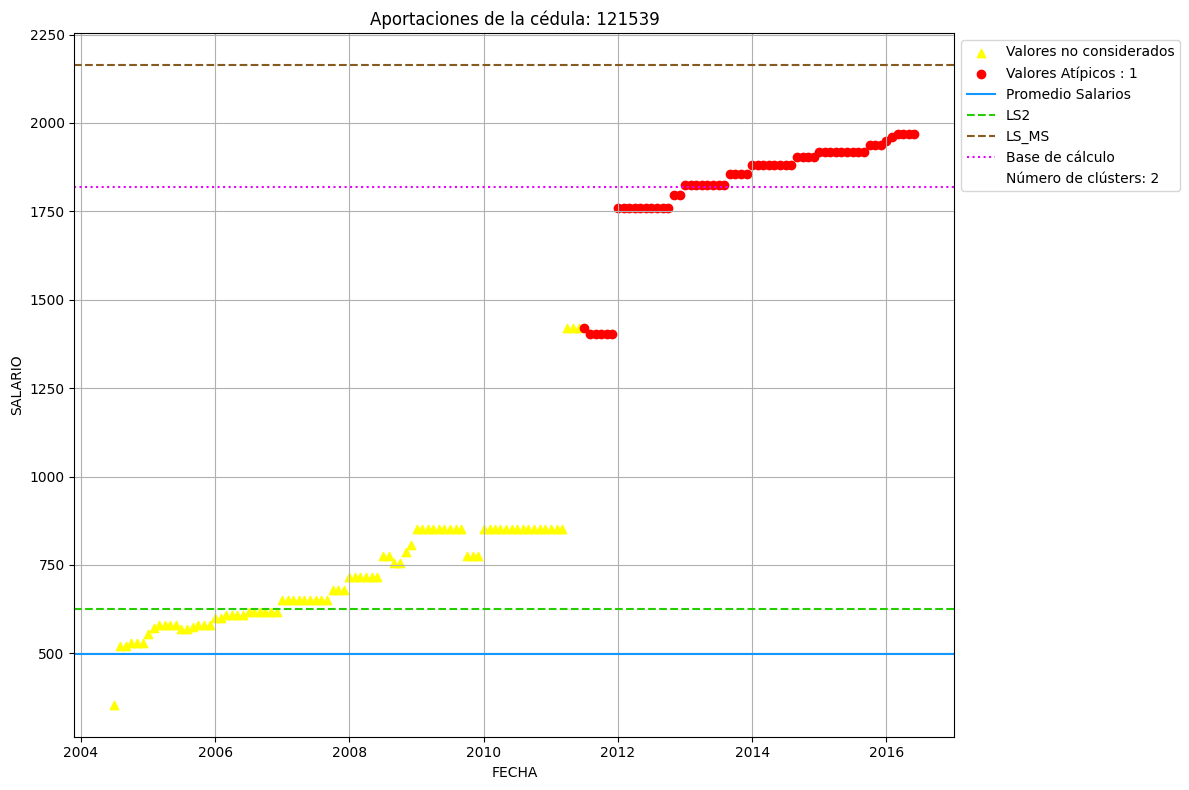

In [95]:
# ced =  29231  #9886,    18457,    18587,     28952,    29231
# graf_datos(data_ati1, ced, 'SALARIO', grupo_sel = 0, tipo = 'ATI_CJ')
# graf_datos_guardar(data_ati1, ced, 'SALARIO', grupo_sel = 0, tipo = 'ATI_CJ', caso=1)

ced =121539 # 32065,    77614,    82208,    91427,   101924,121539   //,   136769,   141723,   151405,   152360,   170923
#graf_datos(data_ati2, ced, 'SALARIO', grupo_sel = 0, tipo = 'ATI_KM')
graf_datos_guardar(data_ati2, ced, 'SALARIO', grupo_sel = 0, tipo = 'ATI_KM', caso=1)

# ced = 6037 # 6037,     8851,   9315, 20856876, 20878541, 20889867, 177653
#graf_datos(data_ati3, ced, 'SALARIO', grupo_sel = 0, tipo = 'ATI_DB')
#graf_datos_guardar(data_ati3, ced, 'SALARIO', grupo_sel = 0, tipo = 'ATI_DB', caso=1)

In [ ]:
#Correcciones de la base de calculo
#A los valores que son nan se le asigna el minimo entre ls2 y ls_ms
data_ati.loc[  (data_ati['BCS_CJ'].isna()) & (data_ati['CEDULA_COD'].isin(ced_ati_cj)),  'BCS_CJ' ] = data_ati[['LS2', 'LS_MS']].min( axis = 1 )
data_ati.loc[  (data_ati['BCS_KM'].isna()) & (data_ati['CEDULA_COD'].isin(ced_ati_km)),  'BCS_KM' ] = data_ati[['LS2', 'LS_MS']].min( axis = 1 )
data_ati.loc[  (data_ati['BCS_DB'].isna()) & (data_ati['CEDULA_COD'].isin(ced_ati_db)),  'BCS_DB' ] = data_ati[['LS2', 'LS_MS']].min( axis = 1 )

In [ ]:
print('Cedulas que tiene valor 1 como atipico en todos sus registros para CJ', 
      data_ati[ data_ati['BCS_CJ'].isna()]['CEDULA_COD'].nunique()) #0
print('Cedulas que tiene valor 1 como atipico en todos sus registros para KM', 
      data_ati[ data_ati['BCS_KM'].isna()]['CEDULA_COD'].nunique()) #0
print('Cedulas que tiene valor 1 como atipico en todos sus registros para DB', 
      data_ati[ data_ati['BCS_DB'].isna()]['CEDULA_COD'].nunique()) #0

In [ ]:
grouped = data_ati['CEDULA_COD'].drop_duplicates().sample(n=30000, random_state=1)
muestra = data_ati[data_ati['CEDULA_COD'].isin(grouped)]
muestra.to_csv('muestra_data_ati.txt', sep='\t', index=False)# Agrupar por CEDULA_COD

In [ ]:
#Se guardan los resultados 
nombre_archivo = 'viu_data_ati_union_base_corr.pkl'
# Ruta completa del archivo
ruta_archivo = os.path.join(directorio, nombre_archivo)
# Guardar los objetos en el archivo
with open(ruta_archivo, 'wb') as archivo:
    pickle.dump(data_ati, archivo) 

In [3]:
#Se cargan datos para comenzar con la union de los pensionistas de vejez
directorio = r_ruta
nombre_archivo = 'viu_data_ati_union_base_corr.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)
data_ati = pd.read_pickle(ruta_archivo)

In [4]:
def graf_metodos(data_i, ced, val, grupo_sel = 0, ati = 'CJ'):
    #Adecuación de la base de datos
    ATI =  'ATI_' + ati
    BCS = 'BCS_' + ati
    
    idx = data_i.columns.get_loc('LS2')
    columnas_requeridas = ['CEDULA_COD', 'ANIO', 'MES', val, 'GRUPO_SEL', 'INDICE', 'BASE_CAL'] + list(data_i.columns[idx:])
    data = data_i[data_i['CEDULA_COD'] == ced][columnas_requeridas]
    
    # Establecer si se quieren todos o solos los 5 mejores años
    if(grupo_sel == 1):
        data = data[data['GRUPO_SEL']==1]
    
    #Fecha para eje x
    anios = data['ANIO'].tolist()
    meses = data['MES'].tolist()
    fechas = [datetime(year=anio, month=mes, day=1) for anio, mes in zip(anios, meses)]
    data['FECHA']= pd.to_datetime(fechas)
    data = data.sort_values(by='FECHA')
    
    #Paleta de colores
    colors = plt.get_cmap('tab20').colors

    # Gráfico
    plt.figure(figsize=(12, 8))  
    marker_dict = {1: 'o', 2: 'x'} 
    
    data_aux = data[data['GRUPO_SEL']==1]
    
    if grupo_sel == 0:  
        Grupo_b= data[(data['GRUPO_SEL'] == 0)]
        plt.scatter(Grupo_b['FECHA'], Grupo_b[val], marker= '^', color='yellow', label='Valores no considerados')
        
        if 0 in (data_aux[ATI].unique()):
            Grupo_a = data_aux[data_aux[ATI] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data_aux[ATI].unique()):
            Grupo= data_aux[data_aux[ATI] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
                
    else:
        if 0 in (data[ATI].unique()):
            Grupo_a = data[data[ATI] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data[ATI].unique()):
            Grupo= data[data[ATI] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
    
    plt.axhline(y= data['SAL_PROM2'].iloc[0], color= '#1297ff', linestyle='-', label='Promedio Salarios')
    plt.axhline(y=data['LS2'].iloc[0], alpha=1 , color= '#25ce00', linestyle='--', label='LS2')
    plt.axhline(y=data_aux['LS_MS'].iloc[0], alpha=1, color= '#875b20', linestyle='--', label='LS_MS')
    plt.axhline(y=data[BCS].iloc[0], alpha=1, color= '#E800FF', linestyle='-', label='Base de cálculo sin atípicos')
    plt.axhline(y=data['BASE_CAL'].iloc[0], alpha=0.5, color= '#E800FF', linestyle=':', label='Base de cálculo')
    
    # Añadir el número de clusters, EPS, MINPTS
    plt.scatter( data_aux['FECHA'].iloc[0], data_aux[val].iloc[0], facecolors='none', label="Número de clústers: {}".format(int(max(data_aux[ATI].unique()) + 1)))
    
    # Añadir títulos y etiquetas
    plt.title(f"Aportaciones de la cédula: {ced}")
    plt.xlabel('FECHA')
    plt.ylabel(f"{val}")
    
    # Crear la leyenda
    leyenda = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    
    plt.grid(True)
    plt.show()
    
def graf_metodos_guardar(data_i, ced, val, grupo_sel = 0, ati = 'CJ', caso = 1):
    #Adecuación de la base de datos
    ATI =  'ATI_' + ati
    BCS = 'BCS_' + ati
    
    idx = data_i.columns.get_loc('LS2')
    columnas_requeridas = ['CEDULA_COD', 'ANIO', 'MES', val, 'GRUPO_SEL', 'INDICE', 'BASE_CAL'] + list(data_i.columns[idx:])
    data = data_i[data_i['CEDULA_COD'] == ced][columnas_requeridas]
    
    # Establecer si se quieren todos o solos los 5 mejores años
    if(grupo_sel == 1):
        data = data[data['GRUPO_SEL']==1]
    
    #Fecha para eje x
    anios = data['ANIO'].tolist()
    meses = data['MES'].tolist()
    fechas = [datetime(year=anio, month=mes, day=1) for anio, mes in zip(anios, meses)]
    data['FECHA']= pd.to_datetime(fechas)
    data = data.sort_values(by='FECHA')
    
    #Paleta de colores
    colors = plt.get_cmap('tab20').colors

    # Gráfico
    plt.figure(figsize=(12, 8))  
    marker_dict = {1: 'o', 2: 'x'} 
    
    data_aux = data[data['GRUPO_SEL']==1]
    
    if grupo_sel == 0:  
        Grupo_b= data[(data['GRUPO_SEL'] == 0)]
        plt.scatter(Grupo_b['FECHA'], Grupo_b[val], marker= '^', color='yellow', label='Valores no considerados')
        
        if 0 in (data_aux[ATI].unique()):
            Grupo_a = data_aux[data_aux[ATI] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data_aux[ATI].unique()):
            Grupo= data_aux[data_aux[ATI] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
                
    else:
        if 0 in (data[ATI].unique()):
            Grupo_a = data[data[ATI] == 0]
            plt.scatter(Grupo_a['FECHA'], Grupo_a[val], marker= marker_dict[1], color='blue', label='Valores No Atípicos : 0')

        if 1 in (data[ATI].unique()):
            Grupo= data[data[ATI] == 1]
            plt.scatter(Grupo['FECHA'], Grupo[val], marker= marker_dict[1], color= 'red', label='Valores Atípicos : 1')
    
    plt.axhline(y= data['SAL_PROM2'].iloc[0], color= '#1297ff', linestyle='-', label='Promedio Salarios')
    plt.axhline(y=data['LS2'].iloc[0], alpha=1 , color= '#25ce00', linestyle='--', label='LS2')
    plt.axhline(y=data_aux['LS_MS'].iloc[0], alpha=1, color= '#875b20', linestyle='--', label='LS_MS')
    plt.axhline(y=data[BCS].iloc[0], alpha=1, color= '#E800FF', linestyle='-', label='Base de cálculo sin atípicos')
    plt.axhline(y=data['BASE_CAL'].iloc[0], alpha=0.5, color= '#E800FF', linestyle=':', label='Base de cálculo')
    
    # Añadir el número de clusters, EPS, MINPTS
    plt.scatter( data_aux['FECHA'].iloc[0], data_aux[val].iloc[0], facecolors='none', label="Número de clústers: {}".format(int(max(data_aux[ATI].unique()) + 1)))
    
    # Añadir títulos y etiquetas
    plt.title(f"Aportaciones de la cédula: {ced}")
    plt.xlabel('FECHA')
    plt.ylabel(f"{val}")
    
    # Crear la leyenda
    leyenda = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    
    plt.grid(True)
    plt.savefig( r_graf + 'base_sin_ati_'+ ati +'_'+str(ced)+'_'+ str(caso)+'.png' )

In [69]:
#data_ati[ (data_ati['BASE_CAL']/data_ati['BCS_CJ']>5) & (data_ati['BASE_CAL']/data_ati['BCS_CJ']<10) ]['CEDULA_COD'].unique()
#data_ati[ (data_ati['BASE_CAL']/data_ati['BCS_CJ']>10) & (data_ati['BASE_CAL']/data_ati['BCS_CJ']<=20) ]['CEDULA_COD'].unique()
#data_ati[ (data_ati['BASE_CAL']/data_ati['BCS_CJ']>20) & (data_ati['BASE_CAL']/data_ati['BCS_CJ']<=30) ]['CEDULA_COD'].unique()
data_ati[ (data_ati['BASE_CAL']/data_ati['BCS_CJ']>40)  ]['CEDULA_COD'].unique()

array([  110456,   172889,  5235533,  5298369, 13161696, 13163602,
       15970353, 16075209, 16135176], dtype=int64)

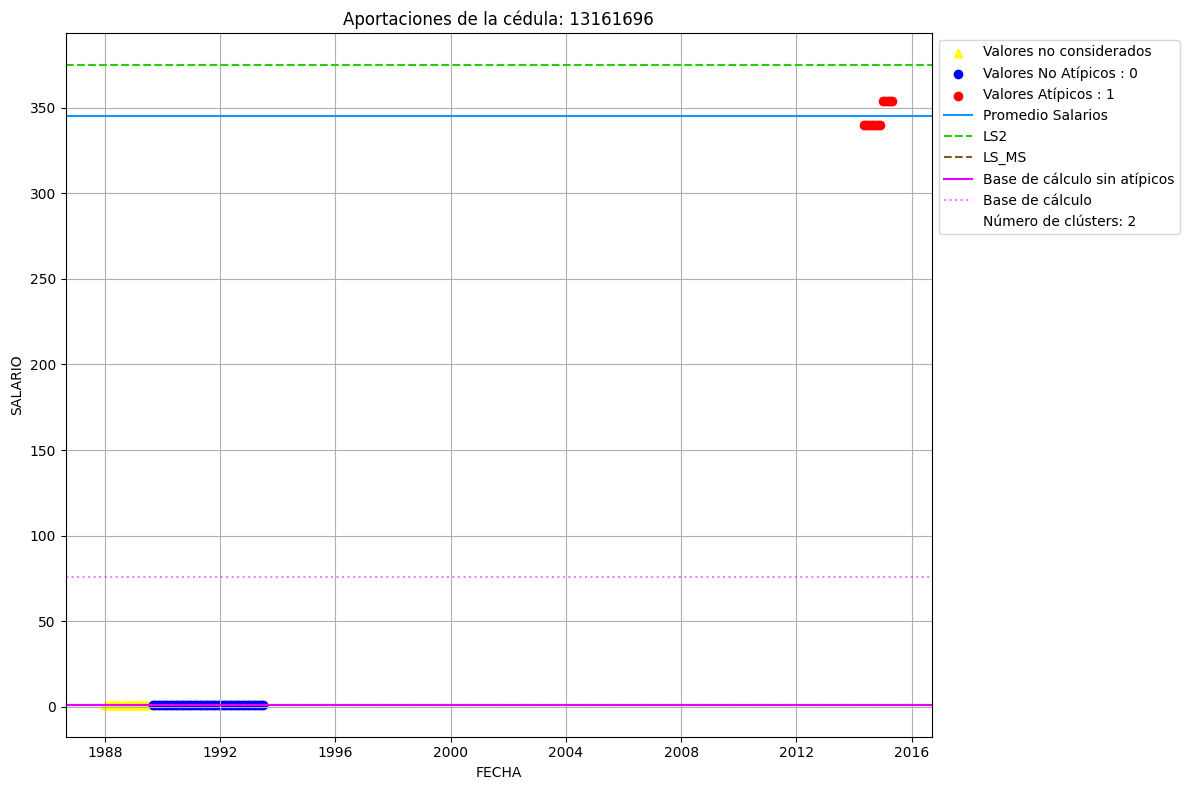

In [106]:
#Bases de calculos mayores a 5 veces y menor igual a 10 // 4382, 26246, 2141271, 10351659
#Bases de calculos mayores a 10 veces y menor iguL a 20 // 1844848, 5287079, 5414462, 13290239
#Bases de calculos mayores a 20 veces y menor iGUAl a 30 // 5579649, 16132025,  16445975,  16508727
#Bases de calculos mayores a 30 veces // 110456,  172889, 16135176, 13161696
ced =  13161696
#graf_metodos( data_ati, ced, 'SALARIO', grupo_sel = 0, ati = 'CJ' )
graf_metodos_guardar( data_ati, ced, 'SALARIO', grupo_sel = 0, ati = 'CJ', caso = 1 )

In [ ]:
data_ati[ (data_ati['CEDULA_COD']==3434) ]['SECTOR_A'].value_counts()

In [ ]:
graf_metodos( data_ati, 23363, 'SALARIO', grupo_sel = 0, ati = 'DB' )

In [ ]:
graf_metodos( data_ati, 23363, 'SALARIO', grupo_sel = 0, ati = 'CJ' )

In [ ]:
print('Comparación CJ con KM',
      data_ati[ (data_ati['GRUPO_SEL']==1) & (data_ati['ATI_CJ']!=data_ati['ATI_KM'])]['CEDULA_COD'].nunique()) #0
print('Comparación CJ con DB',
      data_ati[ (data_ati['GRUPO_SEL']==1) & (data_ati['ATI_CJ']!=data_ati['ATI_DB'])]['CEDULA_COD'].nunique()) # 77834
print('Comparación KM con DB',
      data_ati[ (data_ati['GRUPO_SEL']==1) & (data_ati['ATI_KM']!=data_ati['ATI_DB'])]['CEDULA_COD'].nunique()) #77834
#Se puede usar CJ o KM como uno solo

In [ ]:
data_ati[data_ati['BCS_KM']!=data_ati['BCS_CJ']]

In [5]:
#Lectura de los pensionistas de vejez
vej = pd.read_csv( ruta_vj, delimiter='\t', encoding='utf-8', decimal='.' )
vej = vej.sort_values( by=["CEDULA_COD"], ascending=[True] )
vej['FECHA_NACIMIENTO'] = pd.to_datetime(vej['FECHA_NACIMIENTO'], format='%d/%m/%Y')
vej['FECHA_MUERTE'] = pd.to_datetime(vej['FECHA_MUERTE'], format='%d/%m/%Y')
vej['FECHA_DERECHO'] = pd.to_datetime(vej['FECHA_DERECHO'], format='%d/%m/%Y')
vej['RANGO_INI_5MEJ'] = pd.to_datetime(vej['RANGO_INI_5MEJ'], format='%d/%m/%Y')
vej['RANGO_FIN_5MEJ'] = pd.to_datetime(vej['RANGO_FIN_5MEJ'], format='%d/%m/%Y')
vej['PRES']='vej'

vej_ic = pd.read_csv( ruta_vj_ic, delimiter=';', encoding='utf-8', decimal='.' )

coef = pd.read_excel( ruta_coe, sheet_name='meses')

In [6]:
vej

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,VALOR_PENSION,PENSION_CAL,ID_PRESTACION,RANGO_INI_5MEJ,RANGO_FIN_5MEJ,N_MESES,PRES
16,114,H,1921-07-12,NaT,1994-07-01,429,0.500000,0.8125,0.00,144.9956,56.17,117.808925,1366082,2004-10-31,1991-05-01,581.0,vej
85324,115,H,1940-12-18,NaT,2006-05-01,368,0.758334,0.7500,0.00,364.9616,276.26,273.721200,1304291,2006-04-30,2001-05-01,370.0,vej
679150,117,H,1940-09-01,NaT,2006-03-01,183,0.500000,0.5625,0.00,67.8673,36.64,38.175356,1408488,2006-02-28,2001-03-01,190.0,vej
469427,119,M,1941-06-30,NaT,1997-08-01,421,0.814167,0.8125,0.00,14.4463,29.64,11.737619,1426099,1997-07-31,1992-08-01,421.0,vej
679275,121,M,1924-01-13,2022-01-27,2003-03-01,120,0.500000,0.5000,0.00,40.1640,32.20,20.082000,1403871,2003-02-28,1998-03-01,127.0,vej
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341057,24044648,NaN,NaT,NaT,2012-01-01,227,0.612500,0.6000,223.96,NaN,175.20,NaN,2354841,NaT,NaT,NaN,vej
127966,24044649,NaN,NaT,NaT,2014-10-01,180,0.562500,0.5625,0.94,NaN,34.00,NaN,2715528,NaT,NaT,NaN,vej
596796,24179775,NaN,NaT,NaT,2022-07-01,158,0.537500,0.5375,5457.04,NaN,1062.50,NaN,3203256,NaT,NaT,NaN,vej
42607,24207317,NaN,NaT,NaT,2014-01-01,150,0.525000,0.5250,1.29,NaN,163.20,NaN,2386107,NaT,NaT,NaN,vej


In [7]:
vej_ic

,ID_PRESTACION,CEDULA_COD,IMPO_2023
0,1400341,163,219.0
1,1418670,186,455.0
2,2161869,196,433.0
3,5985,197,202.0
4,741300,216,547.0
...,...,...,...
681796,3252938,20847353,183.0
681797,3097064,20847354,268.0
681798,3302140,21729781,326.0
681799,1404954,23135687,NaN


In [8]:
coef.rename(columns={'ANIOS_IMPO': 'NUMERO_IMPOSICIONES', }, inplace=True)
coef

,NUMERO_IMPOSICIONES,COEFICIENTE
0,60,0.4375
1,61,0.4375
2,62,0.4375
3,63,0.4375
4,64,0.4375
...,...,...
703,763,1.2875
704,764,1.2875
705,765,1.2875
706,766,1.2875


In [10]:
print('Pensionistas únicos de vejez', vej['CEDULA_COD'].nunique()) #627478
print('Pensionistas únicos de vejez con imposicones', vej_ic['CEDULA_COD'].nunique()) #627478

print('Pensionistas únicos de vejez', vej['ID_PRESTACION'].nunique()) #681799
print('Pensionistas únicos de vejez con imposicones', vej_ic['ID_PRESTACION'].nunique()) #681801

Pensionistas únicos de vejez 627478
Pensionistas únicos de vejez con imposicones 627478
Pensionistas únicos de vejez 681799
Pensionistas únicos de vejez con imposicones 681801


In [11]:
#Se une con el número de imposiciones calculadas
vej = pd.merge( vej, vej_ic, on=['ID_PRESTACION', 'CEDULA_COD'], how='left')

In [12]:
vej

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,VALOR_PENSION,PENSION_CAL,ID_PRESTACION,RANGO_INI_5MEJ,RANGO_FIN_5MEJ,N_MESES,PRES,IMPO_2023
0,114,H,1921-07-12,NaT,1994-07-01,429,0.500000,0.8125,0.00,144.9956,56.17,117.808925,1366082,2004-10-31,1991-05-01,581.0,vej,577.0
1,115,H,1940-12-18,NaT,2006-05-01,368,0.758334,0.7500,0.00,364.9616,276.26,273.721200,1304291,2006-04-30,2001-05-01,370.0,vej,368.0
2,117,H,1940-09-01,NaT,2006-03-01,183,0.500000,0.5625,0.00,67.8673,36.64,38.175356,1408488,2006-02-28,2001-03-01,190.0,vej,189.0
3,119,M,1941-06-30,NaT,1997-08-01,421,0.814167,0.8125,0.00,14.4463,29.64,11.737619,1426099,1997-07-31,1992-08-01,421.0,vej,421.0
4,121,M,1924-01-13,2022-01-27,2003-03-01,120,0.500000,0.5000,0.00,40.1640,32.20,20.082000,1403871,2003-02-28,1998-03-01,127.0,vej,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681794,24044648,NaN,NaT,NaT,2012-01-01,227,0.612500,0.6000,223.96,NaN,175.20,NaN,2354841,NaT,NaT,NaN,vej,NaN
681795,24044649,NaN,NaT,NaT,2014-10-01,180,0.562500,0.5625,0.94,NaN,34.00,NaN,2715528,NaT,NaT,NaN,vej,NaN
681796,24179775,NaN,NaT,NaT,2022-07-01,158,0.537500,0.5375,5457.04,NaN,1062.50,NaN,3203256,NaT,NaT,NaN,vej,NaN
681797,24207317,NaN,NaT,NaT,2014-01-01,150,0.525000,0.5250,1.29,NaN,163.20,NaN,2386107,NaT,NaT,NaN,vej,NaN


In [ ]:
vej_ic[vej_ic['CEDULA_COD']==24207317]

In [13]:
def pens_correc( data ):
    inicio = time.time() 

    cedula_1 = data[data.groupby('CEDULA_COD')['CEDULA_COD'].transform('size') == 1]['CEDULA_COD'].copy()
    ul = data[   data['CEDULA_COD'].isin( cedula_1 )]
    ml = data[  ~data['CEDULA_COD'].isin( cedula_1 )]

    mask = ml.drop(columns=['ID_PRESTACION']).groupby('CEDULA_COD').transform(lambda x: (x == x.iloc[0]).all())
    cedulas_iguales = ml[mask.all(axis=1)]['CEDULA_COD']
    ml1 = ml[ ml['CEDULA_COD'].isin( cedulas_iguales)].groupby('CEDULA_COD').first().reset_index()

    #Se corrigen los registros duplicados
    ml2 = ml[ ~(ml['CEDULA_COD'].isin( cedulas_iguales))].copy()

    vej_non_na = ml2[ml2['COEFICIENTE_CAL'].notna() ]
    vej_non_na_unique = vej_non_na.sort_values('FECHA_DERECHO', ascending=False).drop_duplicates(subset='CEDULA_COD', keep='first')
    vej_na = ml2[ml2['COEFICIENTE_CAL'].isna()]
    vej_na_unique = vej_na.sort_values('FECHA_DERECHO', ascending=False).drop_duplicates(subset='CEDULA_COD', keep='first')
    vej_na_unique_f = vej_na_unique[~vej_na_unique['CEDULA_COD'].isin(vej_non_na_unique['CEDULA_COD'])]
    vej_combined = pd.concat([ vej_na_unique_f, vej_non_na_unique])

    ml3 = vej_combined.reset_index().drop(columns = ['index'])
    sal = pd.concat([ ul, ml1, ml3]) 
    
    return sal
    
    del ul, ml, mask, cedulas_iguales, ml1, ml2, ml3, vej_non_na, vej_non_na_unique,vej_na,vej_na_unique,vej_combined
    gc.collect()
    
    fin = time.time()  
    tm = fin - inicio
    print('\tTiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y',tm%60,'segundos')

In [14]:
vej = pens_correc( vej )

In [15]:
vej

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,VALOR_PENSION,PENSION_CAL,ID_PRESTACION,RANGO_INI_5MEJ,RANGO_FIN_5MEJ,N_MESES,PRES,IMPO_2023
0,114,H,1921-07-12,NaT,1994-07-01,429,0.500000,0.8125,0.0,144.9956,56.17,117.808925,1366082,2004-10-31,1991-05-01,581.0,vej,577.0
1,115,H,1940-12-18,NaT,2006-05-01,368,0.758334,0.7500,0.0,364.9616,276.26,273.721200,1304291,2006-04-30,2001-05-01,370.0,vej,368.0
2,117,H,1940-09-01,NaT,2006-03-01,183,0.500000,0.5625,0.0,67.8673,36.64,38.175356,1408488,2006-02-28,2001-03-01,190.0,vej,189.0
3,119,M,1941-06-30,NaT,1997-08-01,421,0.814167,0.8125,0.0,14.4463,29.64,11.737619,1426099,1997-07-31,1992-08-01,421.0,vej,421.0
4,121,M,1924-01-13,2022-01-27,2003-03-01,120,0.500000,0.5000,0.0,40.1640,32.20,20.082000,1403871,2003-02-28,1998-03-01,127.0,vej,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45479,15613950,M,1914-10-08,2016-01-14,1964-03-07,382,0.772917,0.7625,0.0,NaN,25.69,NaN,2114084,NaT,NaT,NaN,vej,NaN
45480,15878748,H,1920-10-23,2012-07-17,1964-01-01,120,0.500000,0.5000,0.0,NaN,25.88,NaN,1441552,NaT,NaT,NaN,vej,NaN
45481,5329353,M,1917-11-25,2019-04-11,1962-11-01,301,0.500000,0.6875,0.0,NaN,404.72,NaN,2104165,NaT,NaT,NaN,vej,NaN
45482,5277700,H,1915-04-15,2012-10-19,1962-07-01,306,0.500000,0.6875,0.0,NaN,414.78,NaN,1260084,NaT,NaT,NaN,vej,NaN


In [16]:
print('Número de cedulas de los afiliados', data_ati['CEDULA_COD'].nunique()) # 442570
print('Número de cedulas de los pensionistas', vej['CEDULA_COD'].nunique()) #627478

Número de cedulas de los afiliados 442570
Número de cedulas de los pensionistas 627478


In [17]:
print( 'Cedulas con 0 imposiciones en pensiones', vej[ vej['NUMERO_IMPOSICIONES']==0]['CEDULA_COD'].nunique()) #2209
print( 'Cedulas con 0 imposiciones calculadas', vej_ic[ vej_ic['IMPO_2023']==0]['CEDULA_COD'].nunique()) #237
print( 'Cedulas con 0 imposiciones calculadas', vej[ vej['IMPO_2023']==0]['CEDULA_COD'].nunique()) #237

Cedulas con 0 imposiciones en pensiones 2209
Cedulas con 0 imposiciones calculadas 237
Cedulas con 0 imposiciones calculadas 237


In [20]:
vej[ (vej['COEFICIENTE_CAL'].isna())]

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,VALOR_PENSION,PENSION_CAL,ID_PRESTACION,RANGO_INI_5MEJ,RANGO_FIN_5MEJ,N_MESES,PRES,IMPO_2023,COEFICIENTE
803,3964,M,1929-12-25,2020-06-20,1976-03-01,NaN,0.0,NaN,0.0,NaN,25.69,NaN,1368107,NaT,NaT,NaN,vej,NaN,NaN
810,3974,H,1933-12-08,2015-07-06,1984-09-01,NaN,0.0,NaN,0.0,NaN,25.69,NaN,1371883,NaT,NaT,NaN,vej,NaN,NaN
2623,14119,M,1938-05-17,NaT,1983-06-01,NaN,0.0,NaN,0.0,NaN,25.69,NaN,1370663,NaT,NaT,NaN,vej,NaN,NaN
3322,17444,H,1929-12-27,2020-12-16,1983-12-01,NaN,0.0,NaN,0.0,NaN,25.69,NaN,1371164,NaT,NaT,NaN,vej,NaN,NaN
3700,19444,H,1934-05-02,2021-05-09,1982-12-01,NaN,0.0,NaN,0.0,NaN,25.69,NaN,1368084,NaT,NaT,NaN,vej,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582180,15890472,H,1925-07-20,2017-10-10,1976-03-01,NaN,0.0,NaN,0.0,NaN,24.48,NaN,1408411,NaT,NaT,NaN,vej,NaN,NaN
582181,1888330,M,1927-03-04,2023-01-04,1974-07-01,NaN,0.0,NaN,0.0,NaN,25.69,NaN,1441728,NaT,NaT,NaN,vej,NaN,NaN
582183,15790773,H,1919-12-21,2011-06-06,1972-06-01,NaN,0.0,NaN,0.0,NaN,0.00,NaN,1444064,NaT,NaT,NaN,vej,NaN,NaN
582184,10499399,H,1921-07-21,2018-10-14,1972-05-01,NaN,0.0,NaN,0.0,NaN,0.00,NaN,1369086,NaT,NaT,NaN,vej,NaN,NaN


In [19]:
vej['NUMERO_IMPOSICIONES'] = np.where( (vej['NUMERO_IMPOSICIONES']==0) & (vej['IMPO_2023']!=0) ,
                                       vej['IMPO_2023'],
                                       vej['NUMERO_IMPOSICIONES'] )

vej['NUMERO_IMPOSICIONES'] = np.where( (vej['NUMERO_IMPOSICIONES']==0) & (vej['IMPO_2023']==0) ,
                                       vej['N_MESES'],
                                       vej['NUMERO_IMPOSICIONES'] )

vej = pd.merge( vej, coef, on=['NUMERO_IMPOSICIONES'], how='left')

vej['COEFICIENTE_CAL'] = np.where( vej['NUMERO_IMPOSICIONES'] < 60,
                                       0.4375,
                                       vej['COEFICIENTE_CAL'] )

vej['COEFICIENTE_CAL'] = np.where( vej['COEFICIENTE_CAL'].isna() & (~vej['COEFICIENTE_REAL'].isna()),
                                   vej['COEFICIENTE_REAL'],
                                   vej['COEFICIENTE_CAL'] )

vej['COEFICIENTE_CAL'] = np.where( vej['COEFICIENTE_CAL']==0,
                                   vej['COEFICIENTE'],
                                   vej['COEFICIENTE_CAL'] )

In [21]:
vej['COEFICIENTE_CAL']

0         0.8125
1         0.7500
2         0.5625
3         0.8125
4         0.5000
           ...  
627473    0.7625
627474    0.5000
627475    0.6875
627476    0.6875
627477    0.5000
Name: COEFICIENTE_CAL, Length: 627478, dtype: float64

In [22]:
print('Cédulas que vejes que estan en los afiliados:',
      vej[vej['CEDULA_COD'].isin(data_ati['CEDULA_COD'].unique())]['CEDULA_COD'].nunique()) #401657

Cédulas que vejes que estan en los afiliados: 401657


In [23]:
ced_afi_vej = vej[vej['CEDULA_COD'].isin(data_ati['CEDULA_COD'].unique())]['CEDULA_COD'].unique()

In [24]:
inicio = time.time()
val = ['CEDULA_COD','INI_CAL', 'FIN_CAL', 'BASE_CAL','LS1', 'SAL_PROM1','LS2', 'SAL_PROM2', 'LS_MS', 'BCS_CJ','BCS_KM','BCS_DB', 'CJ', 'KM', 'DB']

#Si la cedula tiene al menos un mes con atipicos se lo clasifica como atipico
data_ati['CJ'] = data_ati['CEDULA_COD'].map( data_ati.groupby('CEDULA_COD')['ATI_CJ'].agg(lambda x: x.max(skipna=True)) )
data_ati['KM'] = data_ati['CEDULA_COD'].map( data_ati.groupby('CEDULA_COD')['ATI_KM'].agg(lambda x: x.max(skipna=True)) )
data_ati['DB'] = data_ati['CEDULA_COD'].map( data_ati.groupby('CEDULA_COD')['ATI_DB'].agg(lambda x: x.max(skipna=True)) )

fin = time.time()  
tm = fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60 ,'minutos y',tm%60, 'segundos' )

fir_data = data_ati.groupby('CEDULA_COD').first().reset_index()
fir_data1 = fir_data[val]


Tiempo de ejecución es: 0.0 horas con 0.0 minutos y 32.0898962020874 segundos


In [ ]:
data_ati[data_ati['CJ']==0]['CEDULA_COD'].unique()

In [ ]:
data_ati[ (data_ati['GRUPO_SEL']==1)&(data_ati['CEDULA_COD']==21729781)]

In [ ]:
graf_metodos( data_ati, 21729781, 'SALARIO', grupo_sel = 0, ati = 'DB' )

In [ ]:
data_ati[data_ati['CJ']==1]['CEDULA_COD'].unique()

In [ ]:
data_ati[ (data_ati['GRUPO_SEL']==1)&(data_ati['CEDULA_COD']==230)]

In [ ]:
graf_metodos( data_ati, 230, 'SALARIO', grupo_sel = 0, ati = 'DB' )

In [ ]:
graf_metodos( data_ati, 18457, 'SALARIO', grupo_sel = 0, ati = 'CJ' )

In [ ]:
data_ati[(data_ati['GRUPO_SEL']==1)&(data_ati['CEDULA_COD']==18457)]

In [25]:
vej = pd.merge( vej, fir_data1, on='CEDULA_COD', how='left')

In [26]:
vej.head(50)

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,...,SAL_PROM1,LS2,SAL_PROM2,LS_MS,BCS_CJ,BCS_KM,BCS_DB,CJ,KM,DB
0,114,H,1921-07-12,NaT,1994-07-01,429.0,0.500000,0.8125,0.00,144.9956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115,H,1940-12-18,NaT,2006-05-01,368.0,0.758334,0.7500,0.00,364.9616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117,H,1940-09-01,NaT,2006-03-01,183.0,0.500000,0.5625,0.00,67.8673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,M,1941-06-30,NaT,1997-08-01,421.0,0.814167,0.8125,0.00,14.4463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121,M,1924-01-13,2022-01-27,2003-03-01,120.0,0.500000,0.5000,0.00,40.1640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,123,M,1942-07-07,NaT,2008-10-01,181.0,0.562500,0.5625,152.23,152.2296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,124,M,1931-06-26,2015-06-12,1990-11-01,120.0,0.500000,0.5000,0.00,2.6679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,126,M,1939-01-13,NaT,2011-01-01,288.0,0.675000,0.6750,213.24,210.6350,...,201.720411,382.495,201.720411,370.00000,210.635000,210.635000,210.635000,0.0,0.0,0.0
8,127,M,1916-11-10,2018-03-25,1974-01-01,429.0,0.827500,0.8125,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,134,M,1925-01-06,2023-07-13,1987-10-01,327.0,0.715625,0.7125,0.00,0.3114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Lectura de los pensionistas de invalidez
inv = pd.read_csv( ruta_inv, delimiter='\t', encoding='utf-8', decimal='.' )
inv = inv.sort_values( by=["CEDULA_COD"], ascending=[True] )
inv['FECHA_NACIMIENTO'] = pd.to_datetime(vej['FECHA_NACIMIENTO'], format='%d/%m/%Y')
inv['FECHA_MUERTE'] = pd.to_datetime(vej['FECHA_MUERTE'], format='%d/%m/%Y')
inv['FECHA_DERECHO'] = pd.to_datetime(vej['FECHA_DERECHO'], format='%d/%m/%Y')
inv['RANGO_INI_5MEJ'] = pd.to_datetime(vej['RANGO_INI_5MEJ'], format='%d/%m/%Y')
inv['RANGO_FIN_5MEJ'] = pd.to_datetime(vej['RANGO_FIN_5MEJ'], format='%d/%m/%Y')
inv['PRES']='inv'

inv_ic = pd.read_csv( ruta_inv_ic, delimiter=';', encoding='utf-8', decimal='.' )

In [28]:
inv

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,VALOR_PENSION,PENSION_CAL,ID_PRESTACION,RANGO_INI_5MEJ,RANGO_FIN_5MEJ,N_MESES,PRES
42083,202,H,1953-11-08,NaT,2013-12-01,141,0.521875,0.5125,0.00,NaN,25.69,NaN,1368242,2013-11-30,2008-12-01,NaN,inv
11829,220,H,1947-09-08,NaT,2012-09-08,161,0.437500,0.5375,0.00,NaN,404.72,NaN,1349069,2013-11-30,2003-10-01,NaN,inv
1,491,H,1940-12-18,NaT,2006-05-01,253,0.638542,0.6375,0.00,9.7173,27.77,6.194779,1385506,2006-04-30,2001-05-01,259.0,inv
5977,790,M,1912-06-28,2011-10-10,2003-09-01,253,0.637500,0.6375,418.08,415.7311,266.53,265.028576,2456202,2003-08-31,1998-09-01,255.0,inv
42098,1019,H,1955-09-07,NaT,2020-12-01,60,0.437500,0.4375,0.00,0.2358,25.61,0.103163,1276408,2020-11-30,2015-12-01,18.0,inv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29866,23402574,H,1956-03-02,NaT,2023-10-01,109,0.487500,0.4875,408.93,424.3439,199.35,206.867651,2708508,2023-09-30,2018-10-01,110.0,inv
29867,23402574,H,1958-11-04,NaT,2020-08-01,109,0.000000,0.4875,0.00,424.3439,199.35,206.867651,3302141,2019-07-31,2013-08-01,110.0,inv
17812,23456125,H,1945-10-04,NaT,2016-06-01,68,0.437500,0.4375,574.18,578.5854,251.20,253.131113,3133014,2016-05-31,2011-06-01,69.0,inv
17825,23723908,NaN,1935-09-27,2020-12-23,2004-10-01,74,0.450000,0.4500,295.12,NaN,170.00,NaN,2321091,2004-09-30,1999-10-01,NaN,inv


In [29]:
#Se une con el número de imposiciones calculadas
inv = pd.merge( inv, inv_ic, on=['ID_PRESTACION', 'CEDULA_COD'], how='left')

In [30]:
inv = pens_correc( inv )

inv['NUMERO_IMPOSICIONES'] = np.where( (inv['NUMERO_IMPOSICIONES']==0) & (inv['IMPO_2023']!=0) ,
                                        inv['IMPO_2023'],
                                        inv['NUMERO_IMPOSICIONES'] )

inv['NUMERO_IMPOSICIONES'] = np.where( (inv['NUMERO_IMPOSICIONES']==0) & (inv['IMPO_2023']==0) ,
                                        inv['N_MESES'],
                                        inv['NUMERO_IMPOSICIONES'] )

inv = pd.merge( inv, coef, on=['NUMERO_IMPOSICIONES'], how='left')

inv['COEFICIENTE_CAL'] = np.where( inv['NUMERO_IMPOSICIONES'] < 60,
                                       0.4375,
                                   inv['COEFICIENTE_CAL'] )

inv['COEFICIENTE_CAL'] = np.where( inv['COEFICIENTE_CAL'].isna() & (~inv['COEFICIENTE_REAL'].isna()),
                                   inv['COEFICIENTE_REAL'],
                                   inv['COEFICIENTE_CAL'] )

inv['COEFICIENTE_CAL'] = np.where( inv['COEFICIENTE_CAL']==0,
                                   inv['COEFICIENTE'],
                                   inv['COEFICIENTE_CAL'] )

In [31]:
print('Número de cedulas de los pensionistas', inv['CEDULA_COD'].nunique()) #44815

Número de cedulas de los pensionistas 44815


In [32]:
print(inv[inv['CEDULA_COD'].isin(data_ati['CEDULA_COD'].unique())]['CEDULA_COD'].nunique()) #27339

27339


In [33]:
inv = pd.merge( inv, fir_data1, on='CEDULA_COD', how='left')

In [34]:
#Lectura de los pensionistas de discapacidad
dis = pd.read_csv( ruta_dis, delimiter='\t', encoding='utf-8', decimal='.' )
dis = dis.sort_values( by=["CEDULA_COD"], ascending=[True] )
dis['FECHA_NACIMIENTO'] = pd.to_datetime(vej['FECHA_NACIMIENTO'], format='%d/%m/%Y')
dis['FECHA_MUERTE'] = pd.to_datetime(vej['FECHA_MUERTE'], format='%d/%m/%Y')
dis['FECHA_DERECHO'] = pd.to_datetime(vej['FECHA_DERECHO'], format='%d/%m/%Y')
dis['RANGO_INI_5MEJ'] = pd.to_datetime(vej['RANGO_INI_5MEJ'], format='%d/%m/%Y')
dis['RANGO_FIN_5MEJ'] = pd.to_datetime(vej['RANGO_FIN_5MEJ'], format='%d/%m/%Y')
dis['PRES']='dis'

dis_ic = pd.read_csv( ruta_dis_ic, delimiter=';', encoding='utf-8', decimal='.' )

In [35]:
dis

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,VALOR_PENSION,PENSION_CAL,ID_PRESTACION,RANGO_INI_5MEJ,RANGO_FIN_5MEJ,N_MESES,PRES
9163,17997,H,1946-01-23,NaT,2022-02-01,309,0.6875,0.6875,1677.05,2203.2088,1152.97,1514.706050,2583222,2022-01-31,2017-02-01,350,dis
11004,17997,H,1932-04-18,2023-08-04,1993-10-01,309,0.0000,0.6875,0.00,2203.2088,1242.00,1514.706050,3219136,1993-09-30,1988-10-01,350,dis
9164,20394,H,1927-02-27,2024-01-01,1996-05-01,324,0.6875,0.7125,2551.71,2555.2520,1576.00,1820.617050,2752451,1996-04-30,1989-06-01,324,dis
11007,20701,H,1928-09-19,NaT,1994-06-01,354,0.6875,0.7375,2744.63,2734.6833,1464.00,2016.828934,2471973,1994-05-31,1989-06-01,359,dis
3659,22909,H,1941-09-21,NaT,2013-04-01,352,0.6875,0.7375,630.92,628.2553,433.76,463.338284,2445574,2013-03-31,2008-04-01,358,dis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11001,20831439,H,1939-11-28,NaT,2007-02-01,302,0.6875,0.6875,1362.12,1363.1663,936.46,937.176831,3200672,2007-01-31,2002-02-01,312,dis
14661,20831581,H,1922-06-03,2017-11-19,2001-12-01,290,0.6875,0.6750,1728.46,2018.4658,1188.32,1362.464415,2825789,2007-12-31,1997-01-01,297,dis
5501,20847366,M,1948-06-18,NaT,2013-06-18,313,0.6875,0.7000,411.79,411.7910,297.50,288.253700,3191216,2013-06-30,1999-07-01,315,dis
14660,20856907,H,1946-05-28,NaT,2011-05-28,338,0.6875,0.7250,1376.48,1378.0005,946.33,999.050363,2944805,2011-04-30,2006-05-01,347,dis


In [36]:
#Se une con el número de imposiciones calculadas
dis = pd.merge( dis, dis_ic, on=['ID_PRESTACION', 'CEDULA_COD'], how='left')

In [37]:
dis = pens_correc( dis )

dis['NUMERO_IMPOSICIONES'] = np.where( (dis['NUMERO_IMPOSICIONES']==0) & (dis['IMPO_2023']!=0) ,
                                        dis['IMPO_2023'],
                                        dis['NUMERO_IMPOSICIONES'] )

dis['NUMERO_IMPOSICIONES'] = np.where( (dis['NUMERO_IMPOSICIONES']==0) & (dis['IMPO_2023']==0) ,
                                        dis['N_MESES'],
                                        dis['NUMERO_IMPOSICIONES'] )

dis = pd.merge( dis, coef, on=['NUMERO_IMPOSICIONES'], how='left')

dis['COEFICIENTE_CAL'] = np.where( dis['NUMERO_IMPOSICIONES'] < 60,
                                       0.4375,
                                   dis['COEFICIENTE_CAL'] )

dis['COEFICIENTE_CAL'] = np.where( dis['COEFICIENTE_CAL'].isna() & (~dis['COEFICIENTE_REAL'].isna()),
                                   dis['COEFICIENTE_REAL'],
                                   dis['COEFICIENTE_CAL'] )

dis['COEFICIENTE_CAL'] = np.where( dis['COEFICIENTE_CAL']==0,
                                   dis['COEFICIENTE'],
                                   dis['COEFICIENTE_CAL'] )

In [38]:
print('Número de cedulas de los pensionistas', dis['CEDULA_COD'].nunique()) #14186

Número de cedulas de los pensionistas 14186


In [39]:
print(dis[dis['CEDULA_COD'].isin(data_ati['CEDULA_COD'].unique())]['CEDULA_COD'].nunique()) #13983

13983


In [40]:
dis = pd.merge( dis, fir_data1, on='CEDULA_COD', how='left')

In [41]:
pen = pd.concat( [ vej, inv, dis], axis=0)
pen

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,...,SAL_PROM1,LS2,SAL_PROM2,LS_MS,BCS_CJ,BCS_KM,BCS_DB,CJ,KM,DB
0,114,H,1921-07-12,NaT,1994-07-01,429.0,0.500000,0.8125,0.00,144.9956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115,H,1940-12-18,NaT,2006-05-01,368.0,0.758334,0.7500,0.00,364.9616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117,H,1940-09-01,NaT,2006-03-01,183.0,0.500000,0.5625,0.00,67.8673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,M,1941-06-30,NaT,1997-08-01,421.0,0.814167,0.8125,0.00,14.4463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121,M,1924-01-13,2022-01-27,2003-03-01,120.0,0.500000,0.5000,0.00,40.1640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14181,13447061,M,1944-01-20,NaT,1996-03-01,452.0,0.687500,0.8605,1198.77,1199.4000,...,764.968700,2498.93250,764.968700,1212.00000,1199.400000,1199.400000,1199.400000,0.0,0.0,0.0
14182,11979151,H,1932-12-18,2018-04-22,1994-09-01,309.0,0.000000,0.6875,0.00,432.2895,...,347.782222,586.32625,347.782222,597.37750,432.289500,432.289500,432.289500,0.0,0.0,0.0
14183,321691,M,1935-09-20,NaT,1994-08-01,312.0,0.000000,0.7000,0.00,404.7345,...,293.140382,747.77500,293.140382,477.18625,404.734500,404.734500,404.734500,0.0,0.0,0.0
14184,13575280,M,1940-02-25,2022-03-03,1992-07-01,257.0,0.687500,0.6375,426.90,429.1896,...,295.714478,716.36500,295.714478,560.27375,426.696949,426.696949,426.696949,1.0,1.0,1.0


In [42]:
pen[ (pen['BASE_CAL'].isna()) & (~pen['PROMEDIO_CAL'].isna()) ]

,CEDULA_COD,SEXO,FECHA_NACIMIENTO,FECHA_MUERTE,FECHA_DERECHO,NUMERO_IMPOSICIONES,COEFICIENTE_REAL,COEFICIENTE_CAL,PROMEDIO_SUELDO_REAL,PROMEDIO_CAL,...,SAL_PROM1,LS2,SAL_PROM2,LS_MS,BCS_CJ,BCS_KM,BCS_DB,CJ,KM,DB
0,114,H,1921-07-12,NaT,1994-07-01,429.0,0.500000,0.8125,0.00,144.9956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115,H,1940-12-18,NaT,2006-05-01,368.0,0.758334,0.7500,0.00,364.9616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117,H,1940-09-01,NaT,2006-03-01,183.0,0.500000,0.5625,0.00,67.8673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,M,1941-06-30,NaT,1997-08-01,421.0,0.814167,0.8125,0.00,14.4463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121,M,1924-01-13,2022-01-27,2003-03-01,120.0,0.500000,0.5000,0.00,40.1640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,20058513,H,1924-06-19,2018-04-24,2000-05-01,346.0,0.687500,0.7250,724.40,723.7293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13925,5744936,H,1942-04-18,NaT,2016-09-01,311.0,0.000000,0.6875,0.00,452.5586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13926,1504444,H,1956-07-23,NaT,2016-09-01,302.0,0.687500,0.6875,405.26,408.6915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13931,5561475,M,1951-05-14,NaT,2016-07-01,265.0,0.000000,0.6500,0.00,288.2540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pen.to_csv('muestra_pensionistas.txt', sep='\t', index=False)

In [43]:
print('Cedulas que no cruzaron', pen[~pen['BASE_CAL'].isna()]['CEDULA_COD'].nunique()) #442570 cedulas que cruzan

Cedulas que no cruzaron 442570


In [44]:
pen = pen[~pen['BASE_CAL'].isna()]

In [45]:
pen = pen.sort_values( by=["CEDULA_COD"], ascending=[True] )

In [48]:
pen.shape

(442979, 33)

In [49]:
#Se cargan datos para comenzar con la union de los pensionistas de vejez
directorio = r_ruta
nombre_archivo = 'viu_clean_caract.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)
caract = pd.read_pickle(ruta_archivo)

In [ ]:
caract[caract['CEDULA_COD']==1380]

In [50]:
pen = pd.merge( pen, caract, on='CEDULA_COD', how='left')

In [52]:
caract.columns

Index(['CEDULA_COD', 'INI_HL', 'FIN_HL', 'MES_AS', 'MES_TU', 'SUELDO',
       'APORTE', 'INTERES_APORTE', 'N_PRI', 'N_PUB', 'N_IND', 'N_VOL_EX',
       'N_VOL_EC', 'N_COD_TR', 'M_PRI', 'M_PUB', 'M_IND', 'M_VOL_EX',
       'M_VOL_EC'],
      dtype='object')

In [ ]:
pen.columns #MES_AS = meses de aporte simultaneos, #MES_TU=meses de trabajo únicos

In [110]:
pen['PEN_CJ'] = pen['COEFICIENTE_CAL'] * pen['BCS_CJ']
pen['PEN_KM'] = pen['COEFICIENTE_CAL'] * pen['BCS_KM']
pen['PEN_DB'] = pen['COEFICIENTE_CAL'] * pen['BCS_DB']

In [111]:
pen[pen['PEN_CJ']==0][['BASE_CAL', 'PROMEDIO_CAL']]

,BASE_CAL,PROMEDIO_CAL
18469,243.366667,244.165


In [112]:
pen['PEN_CJ'] = np.where( pen['PEN_CJ']==0,
                          pen['PROMEDIO_CAL'],
                          pen['PEN_CJ'] )
pen['PEN_KM'] = np.where( pen['PEN_KM']==0,
                          pen['PROMEDIO_CAL'],
                          pen['PEN_KM'] )
pen['PEN_DB'] = np.where( pen['PEN_DB']==0,
                          pen['PROMEDIO_CAL'],
                          pen['PEN_DB'] )

In [113]:
val = ['CEDULA_COD', 'SEXO', 'FECHA_NACIMIENTO', 'FECHA_MUERTE',
       'FECHA_DERECHO', 'NUMERO_IMPOSICIONES', 'COEFICIENTE_REAL',
       'COEFICIENTE_CAL', 'PROMEDIO_CAL',
       'PENSION_CAL', 'RANGO_INI_5MEJ',
       'RANGO_FIN_5MEJ', 'N_MESES', 'PRES', 'INI_CAL', 'FIN_CAL', 'BASE_CAL','LS1', 'SAL_PROM1',
       'LS2', 'SAL_PROM2', 'LS_MS', 'BCS_CJ', 'BCS_KM', 'BCS_DB', 'CJ', 'KM',
       'DB', 'INI_HL', 'FIN_HL', 'MES_AS', 'MES_TU', 'SUELDO','APORTE','INTERES_APORTE','N_PRI','N_PUB','N_IND','N_VOL_EC',
       'N_VOL_EX', 'N_COD_TR','M_PRI','M_PUB','M_IND','M_VOL_EC','M_VOL_EX',
       'PEN_CJ','PEN_KM', 'PEN_DB']
pen = pen[val]

In [114]:
#Se guardan los resultados 
nombre_archivo = 'viu_data_ati_pen.pkl'
# Ruta completa del archivo
ruta_archivo = os.path.join(directorio, nombre_archivo)
# Guardar los objetos en el archivo
with open(ruta_archivo, 'wb') as archivo:
    pickle.dump(pen, archivo) 

In [ ]:
pen['CEDULA_COD'].nunique()

In [115]:
pen[pen['NUMERO_IMPOSICIONES']==pen['N_MESES']][['N_MESES','NUMERO_IMPOSICIONES','MES_TU']]

,N_MESES,NUMERO_IMPOSICIONES,MES_TU
3,278.0,278.0,126
4,481.0,481.0,83
7,560.0,560.0,88
8,191.0,191.0,102
10,555.0,555.0,91
...,...,...,...
442933,440.0,440.0,141
442934,452.0,452.0,131
442940,277.0,277.0,206
442942,232.0,232.0,129
